<font size="3">Dataset has 2 columns — “Years of Experience” and “Salary” for 30 employees in a company. So in this example, we will train a Simple Linear Regression model to learn the correlation between the number of years of experience of each employee and their respective salary. Once the model is trained, we will be able to do some sample predictions.</font>

Objective: To predict the salary of an employee given how many years of experience they have.

In [1]:
#Import the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
#Load the dataset
salary_exp= pd.read_csv("Salary.csv")

In [3]:
salary_exp

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
#Collecting x and y
x= salary_exp['YearsExperience'].values
y=salary_exp['Salary'].values

In [5]:
print(x)
print(y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5 11.2 11.5 12.3 12.9 13.5]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872
 127345 126756 128765 135675 139465]


In [6]:
#Mean of x,y

mean_x= np.mean(x)
mean_y=np.mean(y)

# Total Number of values
n=len(x)

#To find model coefficients b1,b0 or m,c in y=mx+c

numerator=0
denominator=0

for i in range (n):
    numerator += (x[i] - mean_x)*(y[i] - mean_y)
    denominator += (x[i] - mean_x) ** 2

b1=numerator / denominator
b0=mean_y = (b1 * mean_x)

print(b1,b0)


8731.941047062493 55086.07380546854


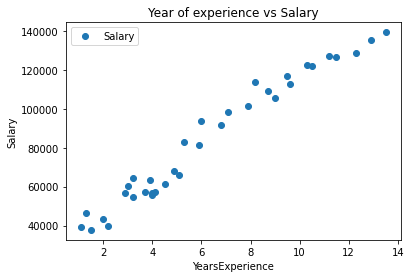

In [7]:
# Plotting the distribution of scores
salary_exp.plot(x='YearsExperience', y='Salary', style='o')  

plt.title('Year of experience vs Salary')  
plt.xlabel('YearsExperience')  
plt.ylabel('Salary')  
plt.show()

From the graph above, we can observe that there is a linear relationship between "Year of experience" and "Salary".Now we can use the linear regression supervised machine model on it to predict further values.

In [8]:
salary_exp.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


In [9]:
#training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x=x.reshape((n,1))
reg = LinearRegression()
reg=reg.fit(x,y)
y_pred=reg.predict(x)
r2_score = reg.score(x,y)
print(r2_score)

0.9651633106751443


In [10]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [11]:
#Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

#Make Prediction
y_pred = lm.predict(x_test)

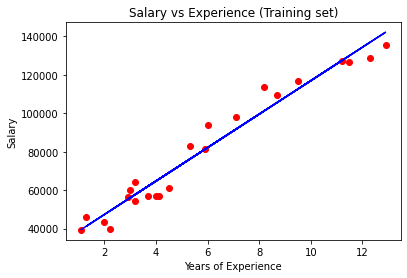

In [12]:
#Visualize training set results

# plot the actual data points of training set
plt.scatter(x_train, y_train, color = 'red')
# plot the regression line
plt.plot(x_train, lm.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

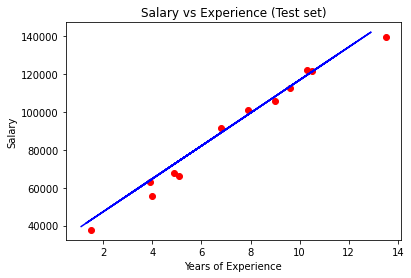

In [13]:
#Visualize test set results

# plot the actual data points of test set
plt.scatter(x_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(x_train, lm.predict(x_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
new_salary_pred = lm.predict([[15]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [160354.52961852]


In [15]:
new_salary_pred = lm.predict([[9]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [108202.45060642]


In [16]:
# Comparing Actual vs Predicted
final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
final 

,Actual,Predicted
0,121872,121240.470359
1,91738,89080.021635
2,66029,74303.599249
3,122391,119502.067726
4,101302,98641.236121
5,67938,72565.196615
6,63218,63873.183446
7,37731,43012.351841
8,55794,64742.384763
9,112635,113417.658508
